In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-muted')
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.grid'] = False
%matplotlib inline

In [2]:
from mectools.endy import random_vec
from mectools.data import noinf, lag_merge

In [3]:
import battle_royale as br

In [4]:
m = br.Model()
m.solve()

-0.43298582 -0.02429261 -0.09934759
-0.43298594 -0.02429262 -0.09934759
-0.43298594 -0.02429262 -0.09934759
-0.43298595 -0.02429262 -0.09934759
-0.43298601 -0.02429262 -0.09934758
-0.43298599 -0.02429262 -0.09934757
+0.70592922 +0.04386864 -0.04579593
-0.26551215 -0.01616321 -0.03189222
+0.17190741 +0.01023665 -0.00992678
-0.04648625 -0.00305633 +0.00237807
-0.00669915 -0.00042316 +0.00046644
+0.00022090 +0.00001450 -0.00001070
-0.00000228 -0.00000015 +0.00000028
-0.00000020 -0.00000001 +0.00000001
+0.00000003 +0.00000000 -0.00000000
-0.00000000 -0.00000000 +0.00000000
0 9.867662242868391e-13 1.4863110742169283e-14
converged: v_err=9.867662242868391e-13, z_err=1.4863110742169283e-14
0 1.0020873020266663e-12
converged: F_err=9.998113448261847e-13


{'e': 0.09704725185022452, 'g': 0.08559311063077112, 'w': 0.9440241341327339}

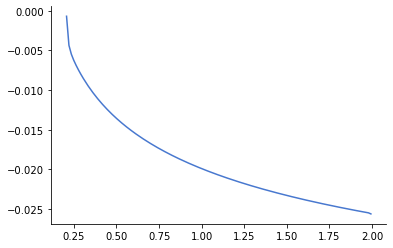

In [5]:
plt.plot(m.q_grid, m.z_grow-m.g);

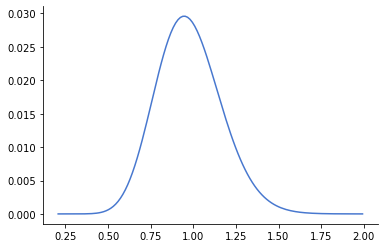

In [6]:
plt.plot(m.q_grid, m.q_dist);

In [7]:
eps = 1e-6
panel = m.simulate()
panel = panel[np.modf(panel['date']+eps)[0]<1e-3]
panel['date'] = np.floor(panel['date']+eps).astype(np.int)

10009 10000


In [8]:
panel.describe()

,qual,revenue,wages,rnd,employ,profit,products,date,firm_id
count,349288.000000,349288.000000,349288.000000,349288.000000,349288.000000,349288.000000,349288.000000,349288.000000,349288.000000
mean,1.393992,1.420879,0.994615,0.152032,1.053591,0.274231,1.431483,24.493289,23434.657403
std,0.884309,1.021526,0.715068,0.096847,0.757468,0.215037,0.879851,14.444202,14794.917103
min,0.376412,0.102301,0.071611,0.060977,0.075857,-0.030287,1.000000,0.000000,0.000000
25%,0.890990,0.762986,0.534090,0.095303,0.565759,0.132491,1.000000,12.000000,10424.000000
50%,1.057155,1.119810,0.783867,0.113566,0.830347,0.216750,1.000000,24.000000,22796.000000
75%,1.667745,1.739723,1.217806,0.182662,1.290016,0.349621,2.000000,37.000000,35599.000000
max,14.046933,15.305834,10.714084,1.563903,11.349375,3.098017,15.000000,49.000000,54396.000000


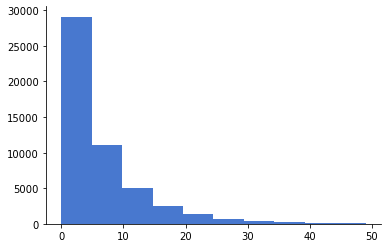

In [9]:
fgrp = panel.groupby('firm_id')['date']
age = fgrp.max() - fgrp.min()
age.hist(grid=False);

In [10]:
fuzz = m.fuzz(panel)
fuzz['year'] = 1970 + fuzz['date']

In [11]:
fuzz.describe()

,qual,revenue,wages,rnd,employ,profit,products,date,firm_id,year
count,349288.000000,349288.000000,349288.000000,349288.000000,349288.000000,349288.000000,349288.000000,349288.000000,349288.000000,349288.000000
mean,1.393992,1.442724,1.015653,0.160768,1.074846,0.287645,1.431483,24.493289,23434.657403,1994.493289
std,0.884309,1.026736,0.718422,0.099665,0.761401,0.219724,0.879851,14.444202,14794.917103,14.444202
min,0.376412,0.107107,0.072905,0.050018,0.078884,-0.036680,1.000000,0.000000,0.000000,1970.000000
25%,0.890990,0.781706,0.553609,0.101377,0.584999,0.143573,1.000000,12.000000,10424.000000,1982.000000
50%,1.057155,1.140537,0.804974,0.124637,0.851842,0.229398,1.000000,24.000000,22796.000000,1994.000000
75%,1.667745,1.763097,1.240731,0.187218,1.313126,0.364079,2.000000,37.000000,35599.000000,2007.000000
max,14.046933,16.360422,10.531047,1.585133,11.975279,3.230671,15.000000,49.000000,54396.000000,2019.000000


In [12]:
panel1 = lag_merge(panel, 'date', id_vars=['firm_id'])

In [13]:
fuzz1 = lag_merge(fuzz, 'date', id_vars=['firm_id'])

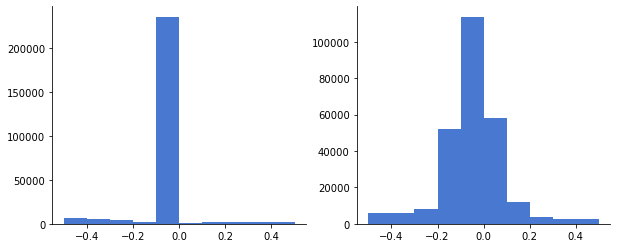

In [14]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))
(noinf(panel1['revenue']/panel1['revenue_prev']).dropna()-1).hist(range=(-0.5, 0.5), grid=False, ax=ax0);
(noinf(fuzz1['revenue']/fuzz1['revenue_prev']).dropna()-1).hist(range=(-0.5, 0.5), grid=False, ax=ax1);

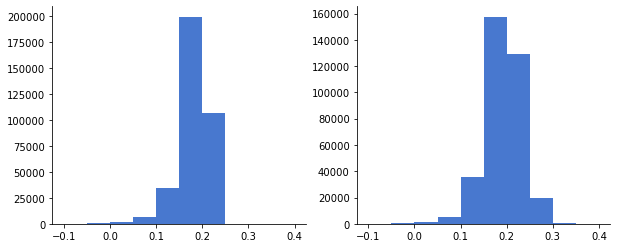

In [15]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))
(panel1['profit']/panel1['revenue']).dropna().hist(range=(-0.1, 0.4), grid=False, ax=ax0);
(fuzz1['profit']/fuzz1['revenue']).dropna().hist(range=(-0.1, 0.4), grid=False, ax=ax1);

0


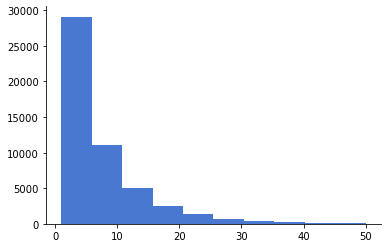

In [16]:
fgrp = fuzz.groupby('firm_id')['year']
age = fgrp.max() - fgrp.min() + 1
dur = fgrp.size()
print(np.max(np.abs(age-dur)))
age.hist(grid=False);

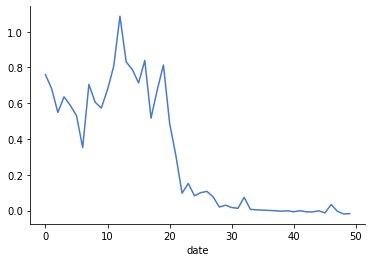

In [17]:
big = fuzz.groupby('firm_id').size().idxmax()
fbig = fuzz.query(f'firm_id == {big}').set_index('date')
fbig['profit'].plot();

In [18]:
fuzz[['firm_id', 'year', 'revenue', 'employ', 'wages', 'rnd', 'profit']].to_csv('battle_royale.csv', index=False)